<a href="https://colab.research.google.com/github/ValinStudent/CSC-481-Spring25/blob/main/Weak_4_Non_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
#Reading Variables and using it for new dataframe

df=df.rename(columns={'medv':'TARGET', 'rm':'RM','lstat':'LSTAT'})
df[['LSTAT','RM','TARGET']].head()

,LSTAT,RM,TARGET
0,4.98,6.575,24.0
1,9.14,6.421,21.6
2,4.03,7.185,34.7
3,2.94,6.998,33.4
4,5.33,7.147,36.2


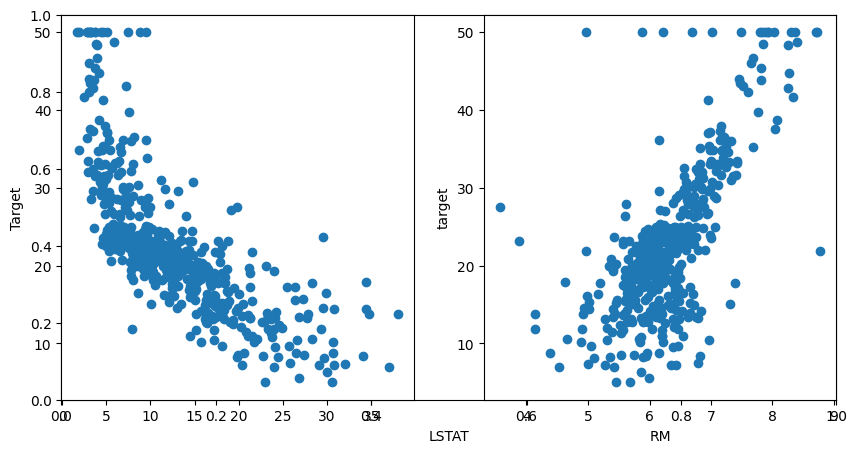

In [4]:
plt.figure(figsize=(10,5))

features =  df[['LSTAT','RM']]
target = df[['TARGET']]

plt.xlabel("LSTAT")
plt.ylabel("Target")
plt.subplot(1,2,1)
plt.scatter(df['LSTAT'],target)

plt.subplot(1,2,2)
plt.scatter(df['RM'],target)
plt.xlabel("RM")
plt.ylabel("target")

plt.show()

In [5]:
X_train, X_test, y_train, y_test  = train_test_split(features,target,test_size=0.2, random_state=23)

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [7]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [8]:
intercept = model.intercept_
coef = model.coef_

In [9]:
intercept

array([0.37428615])

In [10]:
coef

array([[-0.66721079,  4.88331552]])

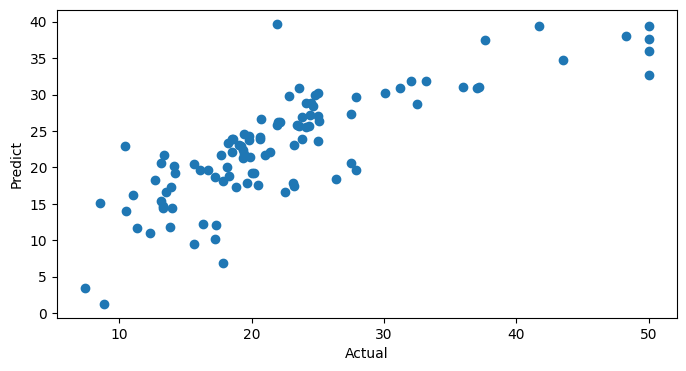

In [11]:
plt.figure(figsize=(8,4))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predict")
#plt.plot([],[],'--k',label="Correct prediction")
plt.show()

In [12]:
mse = mean_squared_error(y_test,y_pred)
print('Mean squared Error', mse)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error',mae)

r2 = r2_score(y_test,y_pred)
print('R2              ',r2)

Mean squared Error 30.726065211573893
Mean Absolute Error 4.300122669036365
R2               0.6433023932639312


In [13]:
new_houses_data={
    'LSTAT':[5.0,4.0,15.0],
    'RM':[7,6,8]

  }

new_houses_df = pd.DataFrame(new_houses_data,columns=["LSTAT","RM"])
new_houses_df

,LSTAT,RM
0,5.0,7
1,4.0,6
2,15.0,8


In [14]:
predicted_house_prices = model.predict(new_houses_df)
predicted_house_prices

array([[31.22144086],
       [27.00533613],
       [29.43264846]])

In [15]:
new_houses_df["Predicted Prices"] = predicted_house_prices
new_houses_df

,LSTAT,RM,Predicted Prices
0,5.0,7,31.221441
1,4.0,6,27.005336
2,15.0,8,29.432648
